In [2]:
''' The renaming code was done locally on sublime text
   and the renamed images were used later in jupyter for futhur processing and coding

import os

def main():
    for count, filename in enumerate(os.listdir("C:\\Users\\DELL\\Desktop\\Notes")):
        name= str(count) +".jpg"
        source= 'C:\\Users\\DELL\\Desktop\\Notes\\' + filename
        name='C:\\Users\\DELL\\Desktop\\Notes\\'+ name
        os.rename(source,name)
if __name__ == '__main__':
    main()'''


' The renaming code was done locally on sublime text\n   and the renamed images were used later in jupyter for futhur processing and coding\n\nimport os\n\ndef main():\n    for count, filename in enumerate(os.listdir("C:\\Users\\DELL\\Desktop\\Notes")):\n        name= str(count) +".jpg"\n        source= \'C:\\Users\\DELL\\Desktop\\Notes\\\' + filename\n        name=\'C:\\Users\\DELL\\Desktop\\Notes\\\'+ name\n        os.rename(source,name)\nif __name__ == \'__main__\':\n    main()'

In [3]:
import numpy as np
import matplotlib as mat
from PIL import Image
from numpy import asarray

memes_X=np.zeros((800,3,64,64),dtype=float)
notes_X=np.zeros((800,3,64,64),dtype=float)

In [5]:
name= 'C:/Users/ADMIN/OneDrive/Documents/CNN_dataset/Memes/1.jpg' 
reshaped = np.array(Image.open(name).resize((64,64)))

print(reshaped.shape)

(64, 64, 3)


In [6]:
#Creating Memes dataset
for i in range(800):
	name= 'C:/Users/ADMIN/OneDrive/Documents/CNN_dataset/Memes/' + str(i) + ".jpg"
	# convert image to numpy array
	reshaped = np.array(Image.open(name).resize((64,64)))
	memes_X[i,:,:,:]=reshaped.transpose(2,1,0)
print(memes_X.shape)

(800, 3, 64, 64)


In [7]:
#segregation  of memes dataset  (train(95%),val(3%),test(2%))
memes_X_train= memes_X[0:int(95*memes_X.shape[0]/100),:,:,:]
memes_Y_train= np.zeros((int(95*memes_X.shape[0]/100),1))   #memes = 0
memes_val    = memes_X[int(95*memes_X.shape[0]/100):int(98*memes_X.shape[0]/100),:,:,:]
memes_val_y  = np.zeros((int(3*memes_X.shape[0]/100),1))
memes_test   = memes_X[int(98*memes_X.shape[0]/100):int(100*memes_X.shape[0]/100),:,:,:]
memes_test_y = np.zeros((int(2*memes_X.shape[0]/100),1))

In [8]:
#Creation of notes dataset
for i in range(800):
	name= 'C:/Users/ADMIN/OneDrive/Documents/CNN_dataset/Notes/' + str(i) + '.jpg'
	# convert image to numpy array
	reshaped = np.array(Image.open(name).resize((64,64)))
	notes_X[i,:,:,:]=reshaped.transpose(2,1,0)

In [9]:
#segregation  of memes dataset  (train(95%),val(3%),test(2%))
notes_X_train= notes_X[0:int(95*memes_X.shape[0]/100),:,:,:]
notes_Y_train= np.ones((int(95*memes_X.shape[0]/100),1))   #notes = 1
notes_val    = notes_X[int(95*memes_X.shape[0]/100):int(98*memes_X.shape[0]/100),:,:,:]
notes_val_y  = np.ones((int(3*memes_X.shape[0]/100),1))
notes_test   = notes_X[int(98*memes_X.shape[0]/100):int(100*memes_X.shape[0]/100),:,:,:]
notes_test_y = np.ones((int(2*memes_X.shape[0]/100),1))

In [10]:
#Shuffling datasets
train_X_org = np.concatenate((memes_X_train,notes_X_train),axis=0)
perm_train = list(np.random.permutation(train_X_org.shape[0]))
train_X = train_X_org[perm_train,:]  #Train set(X)
print("train_X shape is : {}".format(train_X.shape))

train_Y_org = np.concatenate((memes_Y_train,notes_Y_train),axis=0)
train_Y = train_Y_org[perm_train,:]  #Train set(Y)
print("train_Y shape is : {}".format(train_Y.shape))

test = np.concatenate((memes_test,notes_test),axis=0)
perm_test = list(np.random.permutation(test.shape[0]))
test = test[perm_test,:] #Test set
print("test shape is : {}".format(test.shape))

test_y = np.concatenate((memes_test_y,notes_test_y),axis=0)
test_y = test_y[perm_test,:]  #Test set
print("test_y shape is : {}".format(test_y.shape))

val = np.concatenate((memes_val,notes_val),axis=0)
perm_val = list(np.random.permutation(val.shape[0]))
val = val[perm_val,:]  #Test set
print("val shape is : {}".format(val.shape))

val_y = np.concatenate((memes_val_y,notes_val_y),axis=0)
val_y = val_y[perm_val,:]  #Test set
print("val_y shape is : {}".format(val_y.shape))


train_X shape is : (1520, 3, 64, 64)
train_Y shape is : (1520, 1)
test shape is : (32, 3, 64, 64)
test_y shape is : (32, 1)
val shape is : (48, 3, 64, 64)
val_y shape is : (48, 1)


In [12]:
#Conversion of numpy dataset into tensorr
import torch
import torch.nn as nn
train_X.astype(float)
train_Y.astype(float)
X_train= torch.from_numpy(train_X)
print(X_train.size())
Y_train= torch.from_numpy(train_Y)
print(Y_train.size())

test.astype(float)
test_y.astype(float)
X_test= torch.from_numpy(test)
Y_test= torch.from_numpy(test_y)

val.astype(float)
val_y.astype(float)
X_val= torch.from_numpy(val)
Y_val= torch.from_numpy(val_y)

torch.Size([1520, 3, 64, 64])
torch.Size([1520, 1])


In [17]:
# Defining CNN model
import torch.optim as optim

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(3,16,3,stride= 1,padding = 1),nn.ReLU(),nn.MaxPool2d(2,stride = 2))
        self.layer2 = nn.Sequential(nn.Conv2d(16,32,3,stride= 1,padding = 1),nn.ReLU(),nn.MaxPool2d(2,stride = 2))
        self.layer3 = nn.Sequential(nn.Conv2d(32,64,2,stride= 1,padding = 1),nn.ReLU(),nn.MaxPool2d(2,stride = 2))
        self.fclayer1 = nn.Sequential(nn.Linear(8*8*64,1000),nn.ReLU())
        self.fclayer2 = nn.Sequential(nn.Linear(1000,1),nn.Sigmoid())
        
        
    def forward(self,x):
        pred = self.layer1(x)
        pred = self.layer2(pred)
        pred = self.layer3(pred)
        pred = pred.reshape(pred.size(0), -1)
        pred = self.fclayer1(pred)
        pred = self.fclayer2(pred)
        return pred
    
model = Model()
 #trainig dataset
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
minibatch_size= int(1520/20)
y={}
y_predict = torch.empty(1520,1)
all_costs = []
for t in range(8):
    cost=0
    for i in range(20):
        # Forward pass: Computes predicted y by passing x to the model
        indices=torch.tensor([(minibatch_size*i),(minibatch_size*(i+1))])
        
        minibatch = X_train[(minibatch_size*i):(minibatch_size*(i+1)),:,:,:]
        
        y["y" + str(i)] = model(minibatch.float())
        
        y_predict[(minibatch_size*i):(minibatch_size*(i+1)),:]= y["y" + str(i)]
        
            # Compute and print loss
        losses = criterion(y["y" + str(i)], Y_train[(minibatch_size*i):(minibatch_size*(i+1)),:].float())
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
        cost= (cost+losses)
    print(t, cost.item()/20)
    all_costs.append(cost.item()/20)
    

    
    

0 2.0440847396850588
1 0.14144163131713866
2 0.06880714297294617
3 0.05691420435905457
4 0.05045161247253418
5 0.04569653272628784
6 0.0403933972120285
7 0.03626384437084198


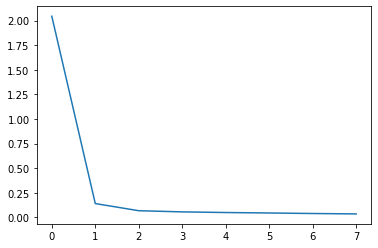

In [18]:
import matplotlib.pyplot as plt
x = range(len(all_costs))
y = all_costs
plt.plot(x,y)

In [19]:
# prediction and accuracy
def accuracy(predicts,labels):
    pred = (predicts>0.5).float()
    acc = (pred==labels).sum().float()
    acc= (acc/labels.size(0)).float()
    acc= acc*100
    return acc
accuracytr = accuracy(y_predict,Y_train)
y_test_pred = model(X_test.float())
accuracyts = accuracy(y_test_pred,Y_test)
y_val_pred = model(X_val.float())
accuracyval = accuracy(y_val_pred,Y_val)
print("Training set accuracy  :  {}".format(accuracytr))
print("test set accuracy      :  {}".format(accuracyts))
print("Validation set accuracy:  {}".format(accuracyval))

Training set accuracy  :  99.01315307617188
test set accuracy      :  100.0
Validation set accuracy:  100.0


Is the image a Meme?
False
True
False


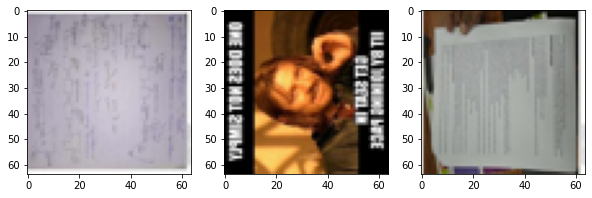

In [58]:
img = X_val[21:24,:,:,:].int()
pred = model(img.float())
pred = pred<0.5
print("Is the image a Meme?")

           
f, axs = plt.subplots(1,3,figsize=(10,10))
axs[0].imshow(img[0,:,:,:].permute(1, 2, 0))
print(pred[0].item())
axs[1].imshow(img[1,:,:,:].permute(1, 2, 0))
print(pred[1].item())
axs[2].imshow(img[2,:,:,:].permute(1, 2, 0))
print(pred[2].item())




